In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [5]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
# --- STEP 2: PREPROCESSING ---
# 1. Feature selection: Starting with core candidate features
features = ["Pclass", "Sex", "SibSp", "Parch", "Age", "Cabin", "Fare"]

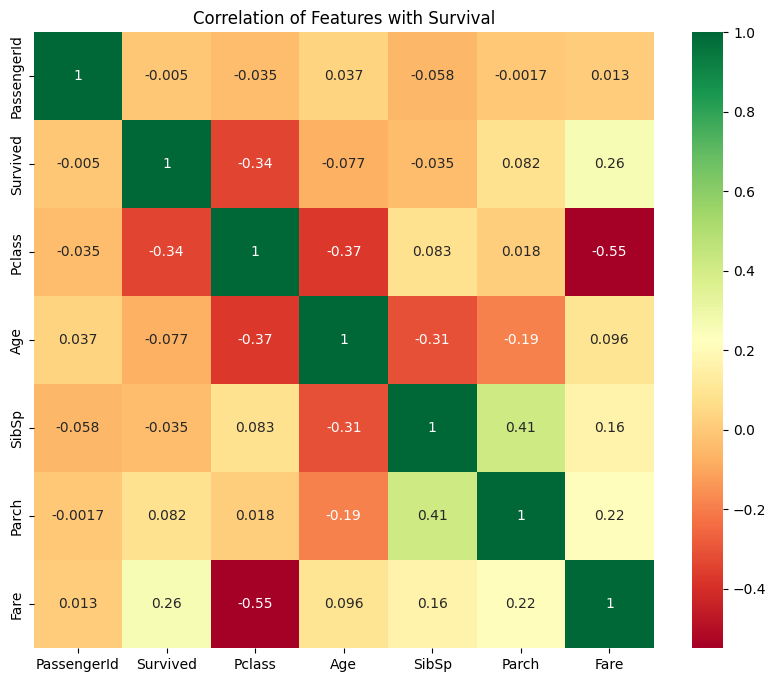

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check correlation of numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='RdYlGn')
plt.title('Correlation of Features with Survival')
plt.show()

In [8]:
# 2. Simplify 'Cabin': Extract Deck letters to reduce noise
train_data['Cabin'] = train_data['Cabin'].apply(lambda x: str(x)[0] if pd.notnull(x) else 'U')
test_data['Cabin'] = test_data['Cabin'].apply(lambda x: str(x)[0] if pd.notnull(x) else 'U')

In [9]:
for col in train_data.columns:
    count = train_data[col].isnull().sum()
    if count > 0:
        print(f"Feature '{col}' has {count} missing values.")

Feature 'Age' has 177 missing values.
Feature 'Embarked' has 2 missing values.


In [10]:
# 3. Handle Missing Values: Use training median for Age
age_median = train_data['Age'].median()
train_data['Age'] = train_data['Age'].fillna(age_median)
test_data['Age'] = test_data['Age'].fillna(age_median)

In [11]:
for col in train_data.columns:
    count = train_data[col].isnull().sum()
    if count > 0:
        print(f"Feature '{col}' has {count} missing values.")

Feature 'Embarked' has 2 missing values.


In [12]:
# 4. Convert Strings to Numbers: One-Hot Encoding
y = train_data["Survived"]
X = pd.get_dummies(train_data[features])
X_competition_test = pd.get_dummies(test_data[features])

In [13]:
# 5. Column Alignment: Fix the ValueError for mismatched Cabin categories
X_competition_test = X_competition_test.reindex(columns=X.columns, fill_value=0)

In [14]:
# --- STEP 3: TRAIN-TEST SPLIT FOR VALIDATION ---
# Split 80% for training and 20% for local validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1234)

/tmp/ipykernel_17/2362074913.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


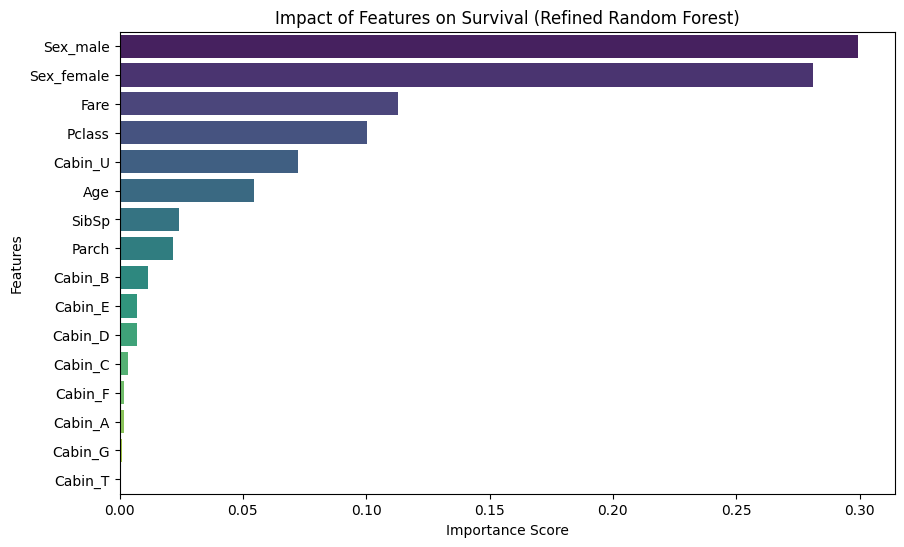

       Feature  Importance
6     Sex_male    0.299190
5   Sex_female    0.281209
4         Fare    0.113007
0       Pclass    0.100354
15     Cabin_U    0.072277
3          Age    0.054395
1        SibSp    0.024235
2        Parch    0.021536
8      Cabin_B    0.011717
11     Cabin_E    0.007077
10     Cabin_D    0.006894
9      Cabin_C    0.003603
12     Cabin_F    0.001797
7      Cabin_A    0.001690
13     Cabin_G    0.000930
14     Cabin_T    0.000091


/tmp/ipykernel_17/2362074913.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


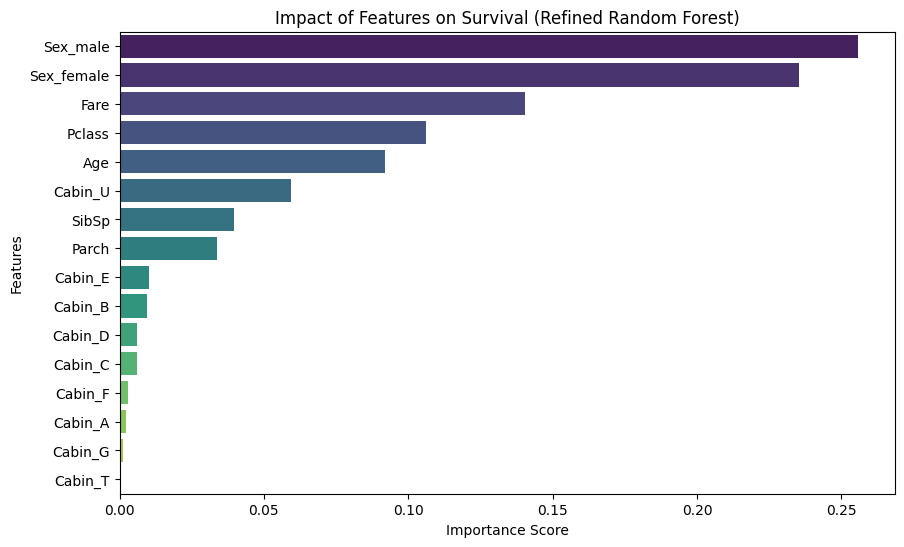

       Feature  Importance
6     Sex_male    0.255648
5   Sex_female    0.235402
4         Fare    0.140306
0       Pclass    0.106073
3          Age    0.091831
15     Cabin_U    0.059280
1        SibSp    0.039502
2        Parch    0.033841
11     Cabin_E    0.010154
8      Cabin_B    0.009403
10     Cabin_D    0.005933
9      Cabin_C    0.005909
12     Cabin_F    0.002851
7      Cabin_A    0.002258
13     Cabin_G    0.001364
14     Cabin_T    0.000246


/tmp/ipykernel_17/2362074913.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


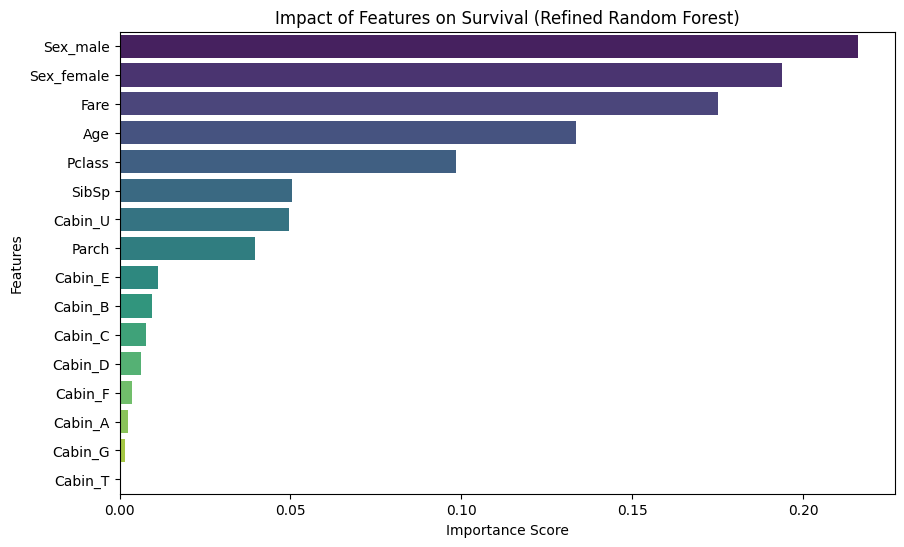

       Feature  Importance
6     Sex_male    0.216003
5   Sex_female    0.194014
4         Fare    0.175104
3          Age    0.133633
0       Pclass    0.098596
1        SibSp    0.050383
15     Cabin_U    0.049691
2        Parch    0.039763
11     Cabin_E    0.011243
8      Cabin_B    0.009636
9      Cabin_C    0.007621
10     Cabin_D    0.006193
12     Cabin_F    0.003557
7      Cabin_A    0.002476
13     Cabin_G    0.001720
14     Cabin_T    0.000365


/tmp/ipykernel_17/2362074913.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


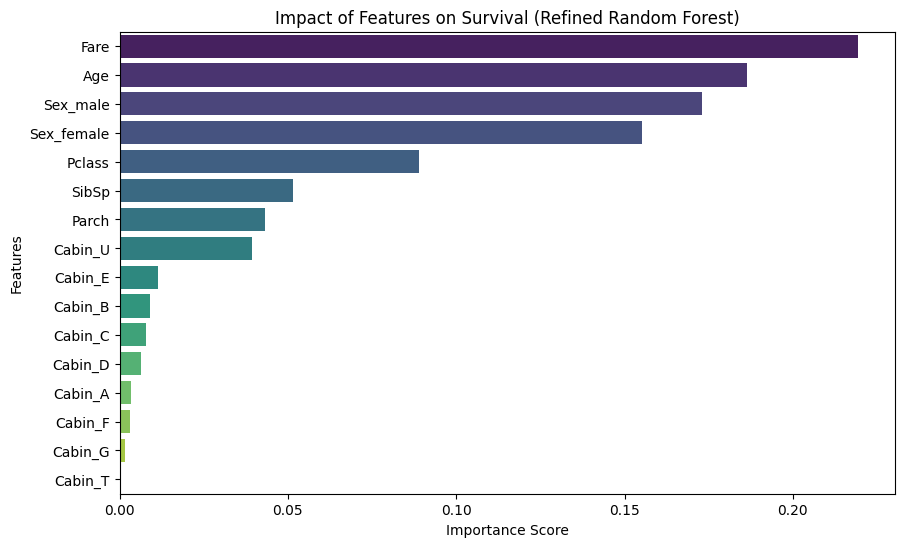

       Feature  Importance
4         Fare    0.219218
3          Age    0.186507
6     Sex_male    0.172883
5   Sex_female    0.155035
0       Pclass    0.088813
1        SibSp    0.051551
2        Parch    0.043233
15     Cabin_U    0.039419
11     Cabin_E    0.011448
8      Cabin_B    0.009072
9      Cabin_C    0.007885
10     Cabin_D    0.006345
7      Cabin_A    0.003286
12     Cabin_F    0.003220
13     Cabin_G    0.001532
14     Cabin_T    0.000553


/tmp/ipykernel_17/2362074913.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


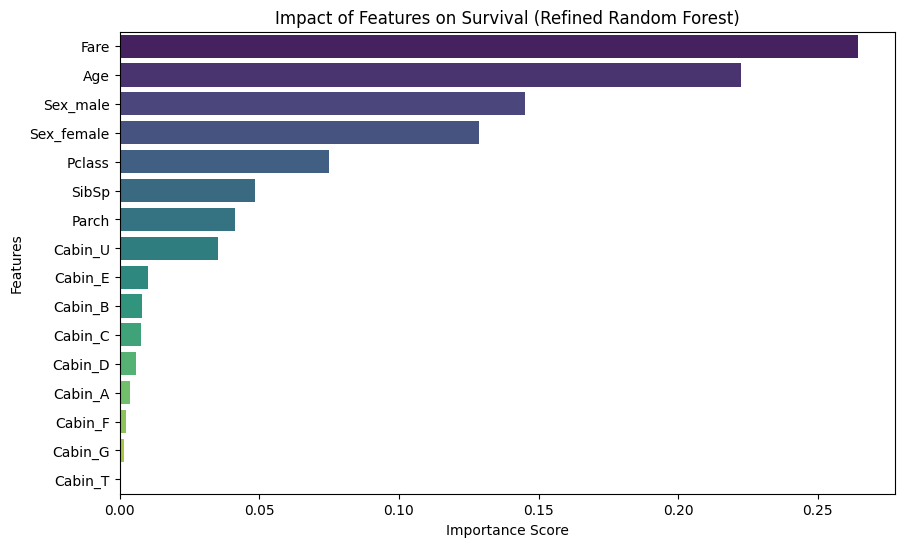

       Feature  Importance
4         Fare    0.264242
3          Age    0.222382
6     Sex_male    0.145222
5   Sex_female    0.128646
0       Pclass    0.075027
1        SibSp    0.048349
2        Parch    0.041351
15     Cabin_U    0.035184
11     Cabin_E    0.010031
8      Cabin_B    0.008071
9      Cabin_C    0.007646
10     Cabin_D    0.005878
7      Cabin_A    0.003589
12     Cabin_F    0.002307
13     Cabin_G    0.001432
14     Cabin_T    0.000643


/tmp/ipykernel_17/2362074913.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


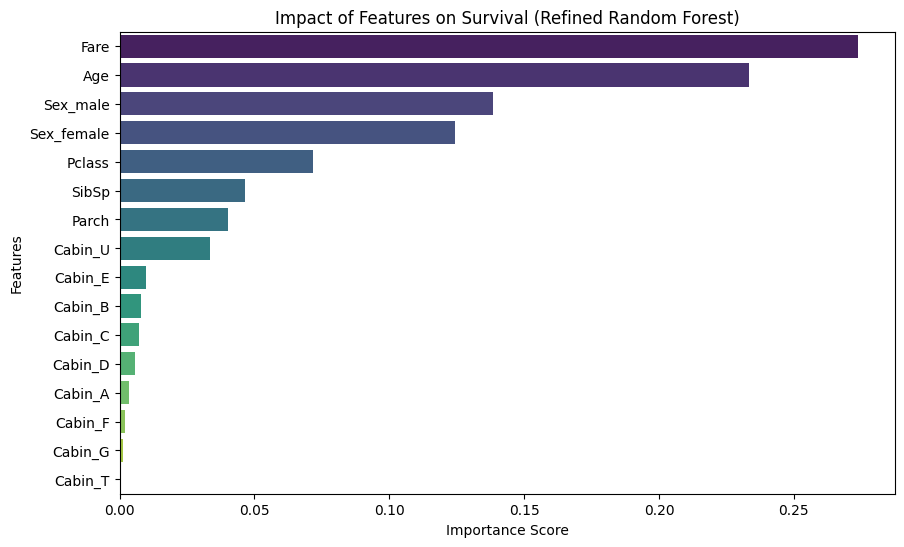

       Feature  Importance
4         Fare    0.273609
3          Age    0.233257
6     Sex_male    0.138389
5   Sex_female    0.124372
0       Pclass    0.071553
1        SibSp    0.046614
2        Parch    0.040116
15     Cabin_U    0.033501
11     Cabin_E    0.009940
8      Cabin_B    0.008064
9      Cabin_C    0.007223
10     Cabin_D    0.005907
7      Cabin_A    0.003383
12     Cabin_F    0.002180
13     Cabin_G    0.001320
14     Cabin_T    0.000573
Best Max Depth: 10 with Accuracy: 0.8547


In [15]:
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

def get_accuracy(max_depth, n_estimators, train_X, val_X, train_y, val_y):

    global model
    # Create the model with specific complexity settings
    model = RandomForestClassifier(max_depth=max_depth, 
                                   n_estimators=n_estimators, 
                                   random_state=14)
    model.fit(train_X, train_y)
    
    # Predict on validation data to see how it performs on "new" data
    preds_val = model.predict(val_X)

    
    # 1. Get feature importance from the FINAL trained model
    importances = model.feature_importances_
    # Use the columns from the filtered data, not the original X
    feature_names = X_train.columns 
    
    # 2. Create a DataFrame for easier plotting
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # 3. Plot the data
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
    plt.title('Impact of Features on Survival (Refined Random Forest)')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()
    
    print(feature_importance_df)

    
    return accuracy_score(val_y, preds_val)


    



# Test different depths to find the best balance
candidate_depths = [3, 5, 7, 10, 15, 20]
scores = {depth: get_accuracy(depth, 500, X_train, X_val, y_train, y_val) 
          for depth in candidate_depths}

best_tree_size = max(scores, key=scores.get)
print(f"Best Max Depth: {best_tree_size} with Accuracy: {scores[best_tree_size]:.4f}")

In [16]:
# --- STEP 6: CREATE SUBMISSION ---
# Predict on the competition test data
final_predictions = model.predict(X_val)

In [17]:
final_predictions

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0])

In [18]:
import joblib

# Save the model to a file
joblib.dump(model, 'titanic_random_forest.pkl')
print("Model object saved as .pkl file")

# To load it back later:
# loaded_model = joblib.load('titanic_random_forest.pkl')

Model object saved as .pkl file
